In [ ]:
import pandas as pd                                                             # Import the pandas library for data manipulation and analysis
import seaborn as sns                                                           # Import the seaborn library for data visualization
import matplotlib.pyplot as plt                                                 # Import matplotlib's pyplot for creating static, animated, and interactive visualizations
import numpy as np                                                              # Import NumPy for numerical operations and working with arrays
from plotnine import *                                                          # Import plotnine for creating plots and graphs
%matplotlib inline


In [ ]:
reviews = pd.read_csv('/content/Airline_Reviews_Combined.csv')                               # Read the CSV file into a pandas DataFrame

In [ ]:
reviews.head(5)                                                                 # Display the first 5 rows of the DataFrame

,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,ground_service,value_for_money,recommended,overall_rating,review,Airlines,year,month
0,Solo Leisure,Economy Class,Bangalore to Paris via Delhi,2024-08-01,2.0,1.0,2.0,1.0,1.0,1.0,0,1.0,Had a flight on 31 August from Bangalore to...,Indigo,2024,8
1,Family Leisure,Economy Class,Sydney to Amritsar via Delhi,2024-09-01,3.0,4.0,1.0,1.0,1.0,2.0,0,1.0,I had the worst experience with Air India. ...,Indigo,2024,9
2,Business,Business Class,London to Delhi,2024-09-01,5.0,5.0,5.0,5.0,5.0,5.0,1,10.0,My husband left his passport at home and is f...,Indigo,2024,9
3,Family Leisure,Economy Class,Delhi to Sydney,2024-09-01,1.0,1.0,2.0,1.0,2.0,1.0,0,1.0,"On the way in from Sydney to Delhi , there ...",Indigo,2024,9
4,Family Leisure,Economy Class,Kochi to Vancouver,2023-12-01,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,"This is the worst airlines anyone can choose,...",Indigo,2023,12


In [ ]:
frequency_table = reviews['travel_class'].value_counts()                               # Create a frequency table of the 'travel class' column
frequency_table

,count
travel_class,
Economy Class,3288
Business Class,382
Premium Economy,59
First Class,16


<ipython-input-6-a8995fb9cbb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



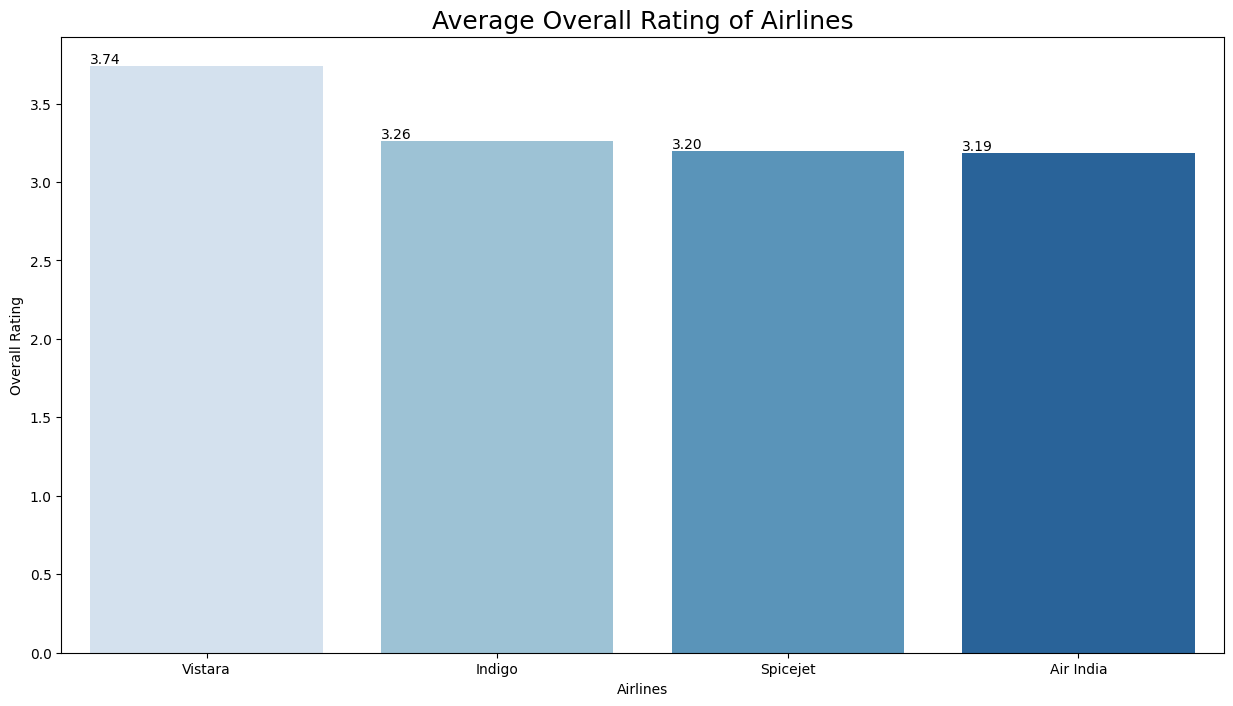

In [ ]:
# Bar Plot - Average Overall Rating of Airlines
Airline_quality = reviews.groupby('Airlines')['overall_rating'].mean().reset_index().sort_values(by = 'overall_rating', ascending = False)
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="Airlines", y="overall_rating", data=Airline_quality, ax=ax, palette="Blues")
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
for p in ax.patches:
    ax.annotate("%0.2f"%(p.get_height()), (p.get_x(), p.get_height() * 1.005))
plt.title("Average Overall Rating of Airlines", fontsize=18, loc='center')
plt.xlabel('Airlines')
plt.ylabel('Overall Rating')
plt.show()

<ipython-input-7-0eded1c3b885>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



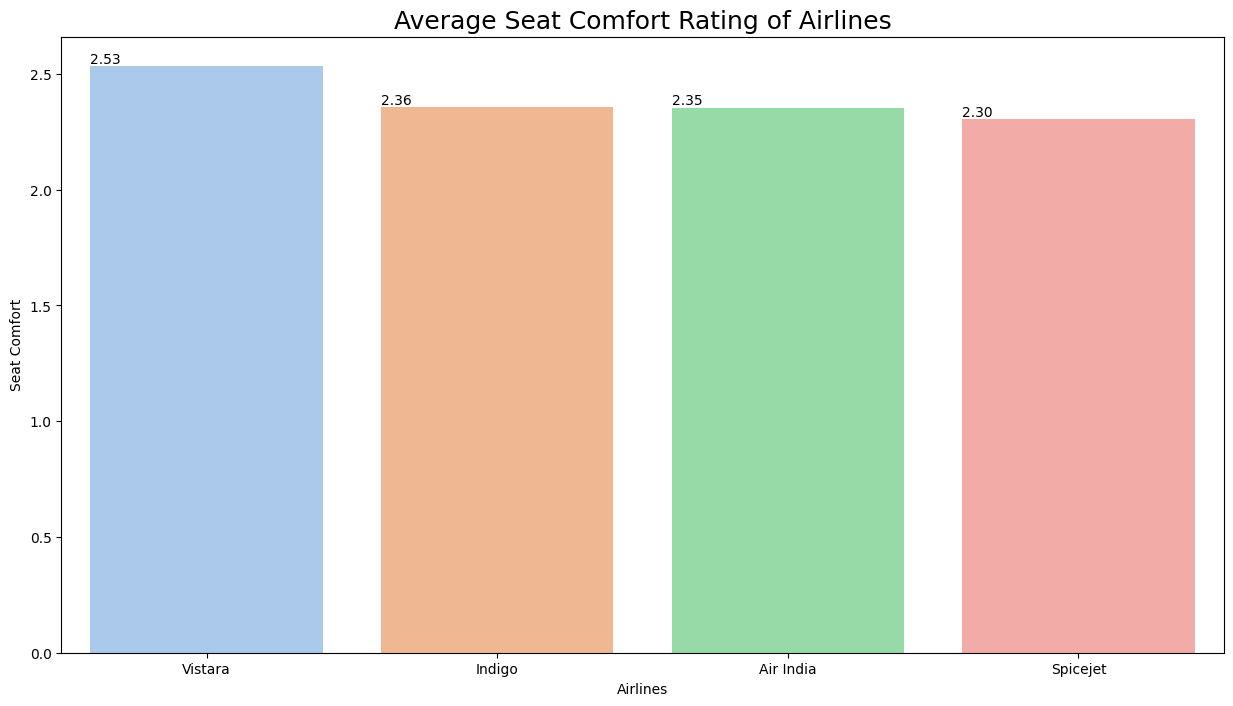

In [ ]:
# Bar Plot - Average Seat Comfort Rating of Airlines
Seat_quality = reviews.groupby('Airlines')['seating_comfort'].mean().reset_index().sort_values(by = 'seating_comfort', ascending = False)
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="Airlines", y="seating_comfort", data=Seat_quality, ax=ax, palette="pastel")
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
for p in ax.patches:
    ax.annotate("%0.2f"%(p.get_height()), (p.get_x(), p.get_height() * 1.005))
plt.title("Average Seat Comfort Rating of Airlines", fontsize=18, loc='center')
plt.xlabel("Airlines")
plt.ylabel("Seat Comfort")
plt.show()

In [ ]:
# creating a new class by grouping Airlines and travel class
df1 = reviews.groupby(['Airlines','travel_class'])['overall_rating'].mean().reset_index()#.sort_values(by = 'OverallScore', ascending = False)
df2 = reviews.groupby(['Airlines','travel_class'])['overall_rating'].count().reset_index()
xx = pd.merge(df1,df2, on = ['Airlines','travel_class'])
#xx = xx[xx['overall_rating_y'] >=25].sort_values(by = 'overall_rating_x', ascending = False)
xx['Class'] = xx['Airlines'] + [' '] +xx['travel_class']
#xx = xx.head(15)

In [ ]:
xx.head(15)

,Airlines,travel_class,overall_rating_x,overall_rating_y,Class
0,Air India,Business Class,4.131868,91,Air India Business Class
1,Air India,Economy Class,3.062300,626,Air India Economy Class
2,Air India,First Class,3.333333,3,Air India First Class
3,Air India,Premium Economy,1.600000,5,Air India Premium Economy
4,Indigo,Business Class,4.131868,91,Indigo Business Class
5,Indigo,Economy Class,3.173554,726,Indigo Economy Class
6,Indigo,First Class,2.750000,4,Indigo First Class
7,Indigo,Premium Economy,1.571429,7,Indigo Premium Economy
8,Spicejet,Business Class,4.195652,92,Spicejet Business Class
9,Spicejet,Economy Class,3.118291,913,Spicejet Economy Class


<ipython-input-10-9bfdb5f3cd5d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-10-9bfdb5f3cd5d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator


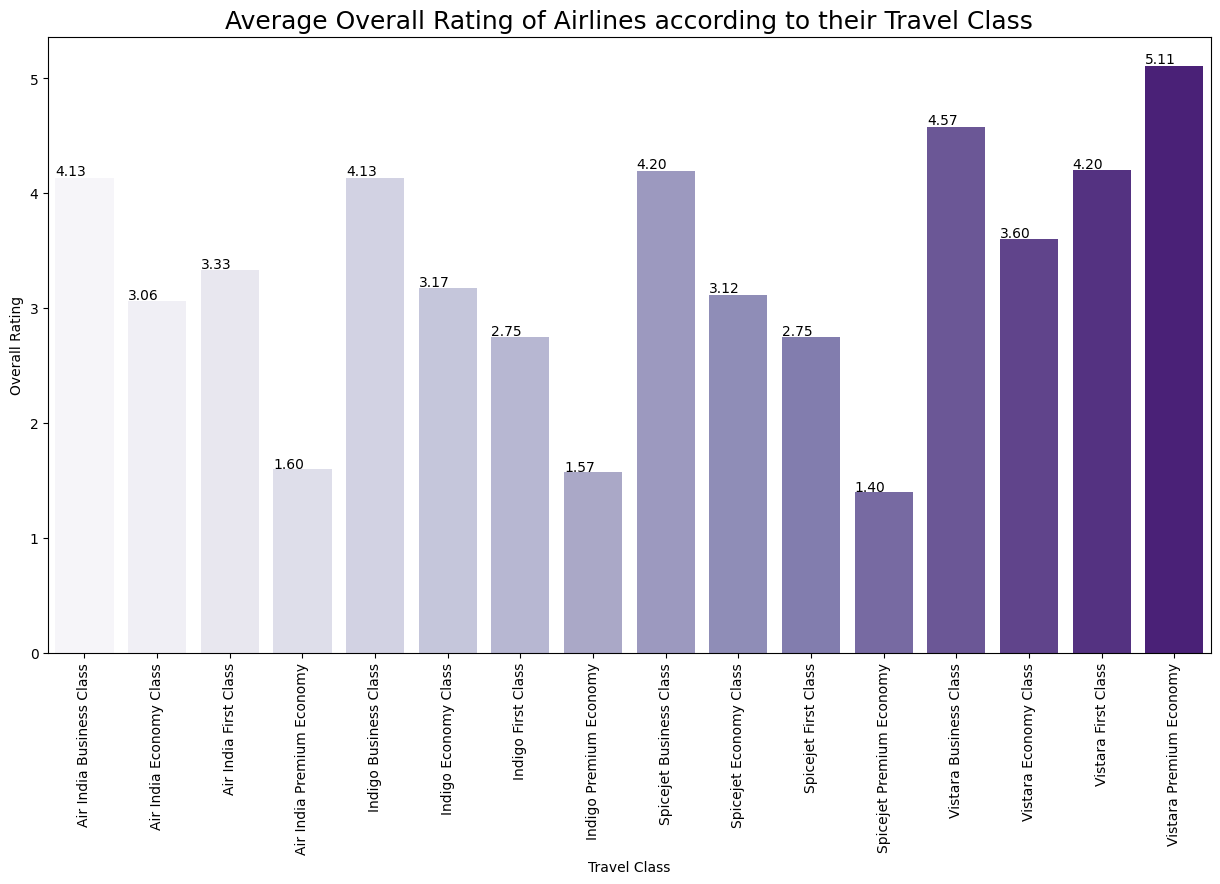

In [ ]:
# Bar Plot - Average Overall Rating of Airlines according to their travel class
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="Class", y="overall_rating_x", data=xx, ax=ax, palette= 'Purples')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
for p in ax.patches:
    ax.annotate("%0.2f"%(p.get_height()), (p.get_x(), p.get_height() * 1.005))
plt.title("Average Overall Rating of Airlines according to their Travel Class", fontsize=18, loc='center')
plt.xlabel("Travel Class")
plt.ylabel("Overall Rating")
plt.show()

<ipython-input-11-8298ff8f613b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator


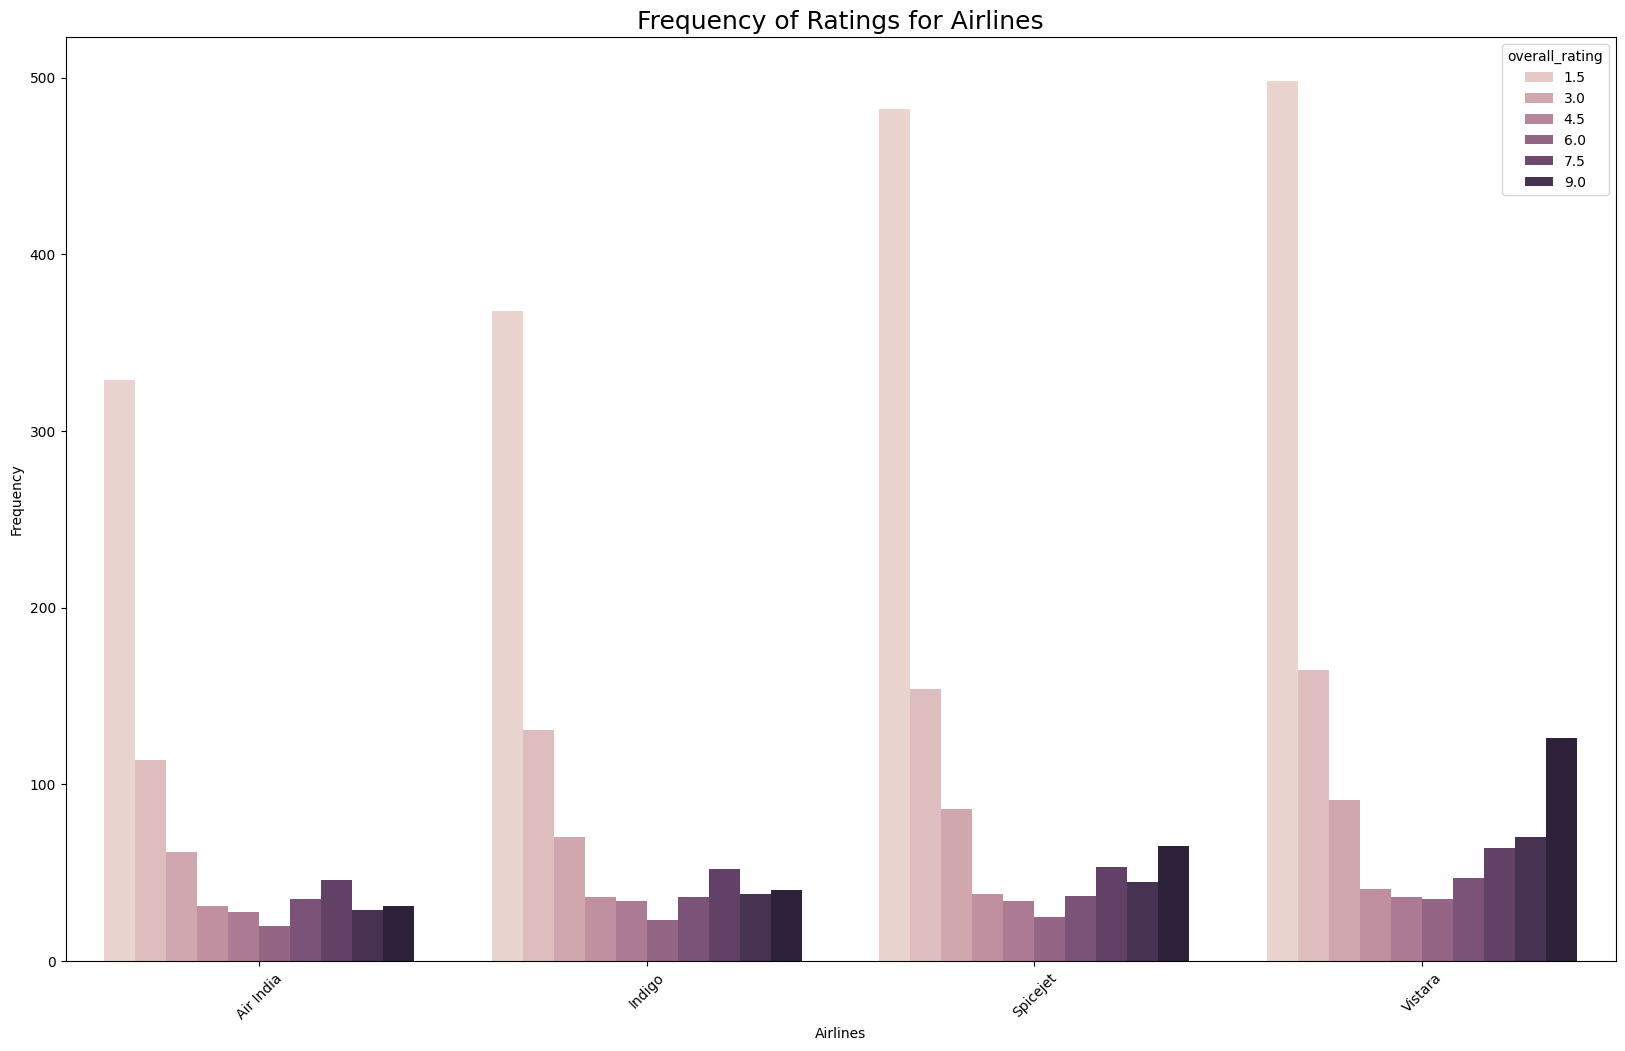

In [ ]:
t = reviews[reviews.overall_rating != 0].groupby(["Airlines","overall_rating"]).date.count().reset_index()
fig, ax = plt.subplots(figsize=(20,12))
sns.barplot(x="Airlines", y="date",hue="overall_rating", data=t, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
# for p in ax.patches:
#     ax.annotate("%0.2f"%(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Frequency of Ratings for Airlines", fontsize=18, loc='center')
plt.xlabel("Airlines")
plt.ylabel("Frequency")
plt.show()

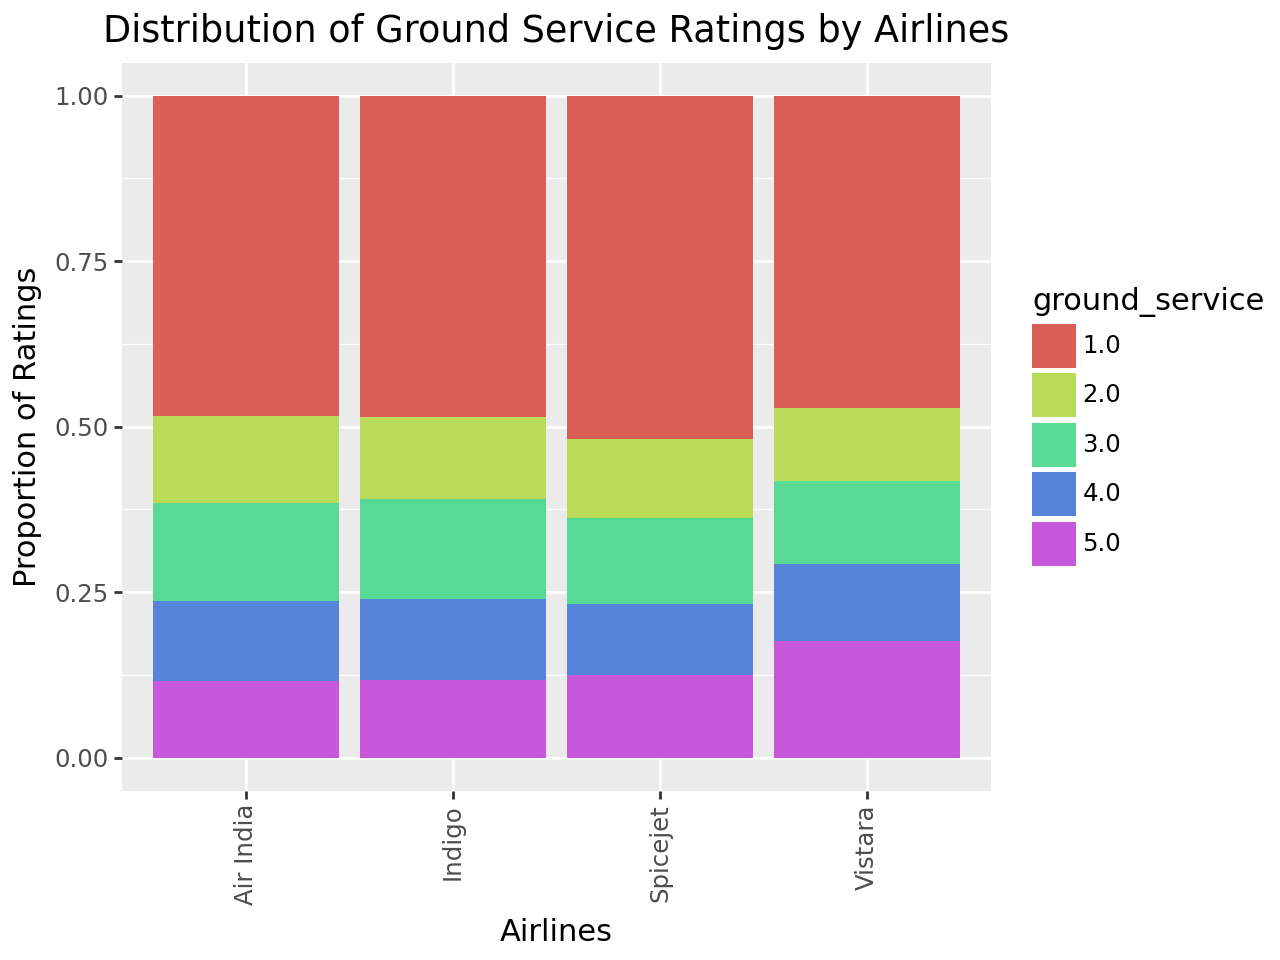

In [ ]:
# Stacked Bar Plot - Average Overall Rating of Airlines according to their Ground Service
# fig, axs = plt.subplots(2, 2, figsize=(12, 8))

reviews['ground_service'] = reviews['ground_service'].astype(str)
(ggplot(reviews[reviews.ground_service != "0"], aes(x="Airlines", fill="ground_service"))
    + geom_bar(position="fill")
    + scale_fill_discrete(name="")
    + theme(axis_text_x=element_text(rotation=90, hjust=2))
)+ labs(title="Distribution of Ground Service Ratings by Airlines",
           x="Airlines",
           y="Proportion of Ratings")



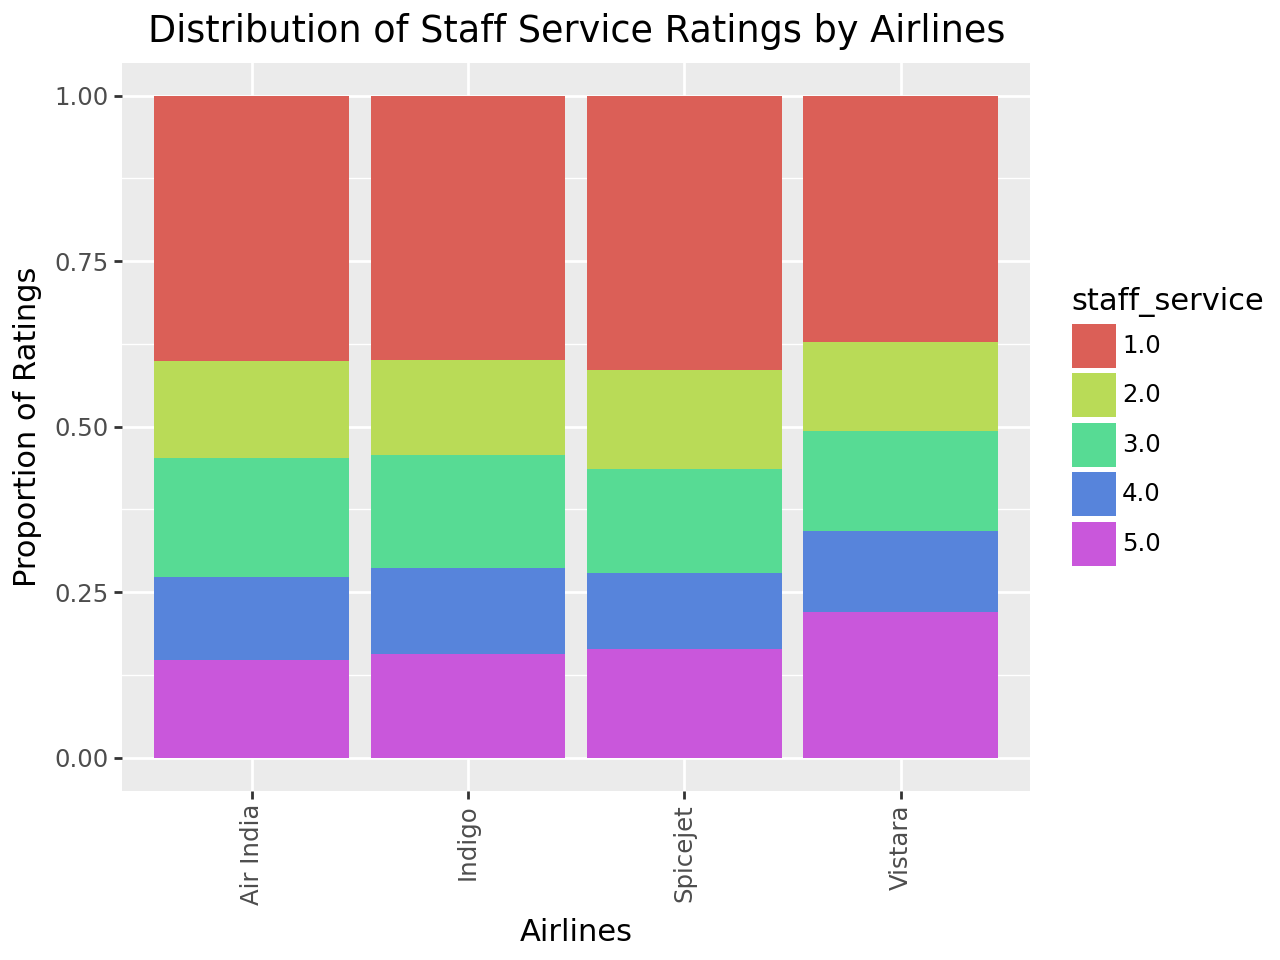

In [ ]:
reviews['staff_service'] = reviews['staff_service'].astype(str)
(ggplot(reviews[reviews.staff_service != "0"], aes(x="Airlines", fill="staff_service"))
    + geom_bar(position="fill")
    + scale_fill_discrete(name="")
    + theme(axis_text_x=element_text(rotation=90, hjust=2))
)+ labs(title="Distribution of Staff Service Ratings by Airlines",
           x="Airlines",
           y="Proportion of Ratings")


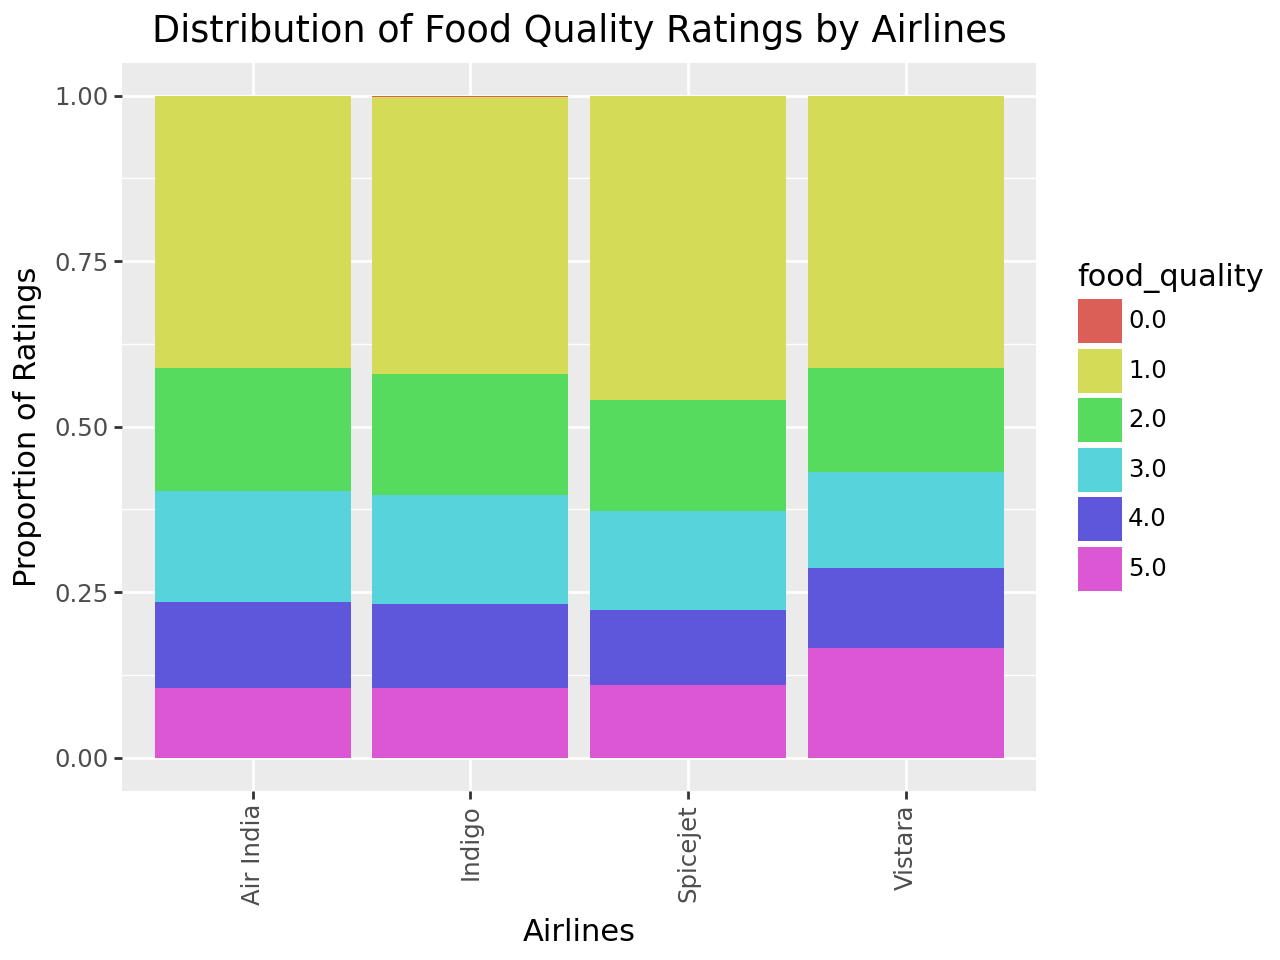

In [ ]:
reviews['food_quality'] = reviews['food_quality'].astype(str)
(ggplot(reviews[reviews.food_quality != "0"], aes(x="Airlines", fill="food_quality"))
    + geom_bar(position="fill")
    + scale_fill_discrete(name="")
    + theme(axis_text_x=element_text(rotation=90, hjust=2))
)+ labs(title="Distribution of Food Quality Ratings by Airlines",
           x="Airlines",
           y="Proportion of Ratings")

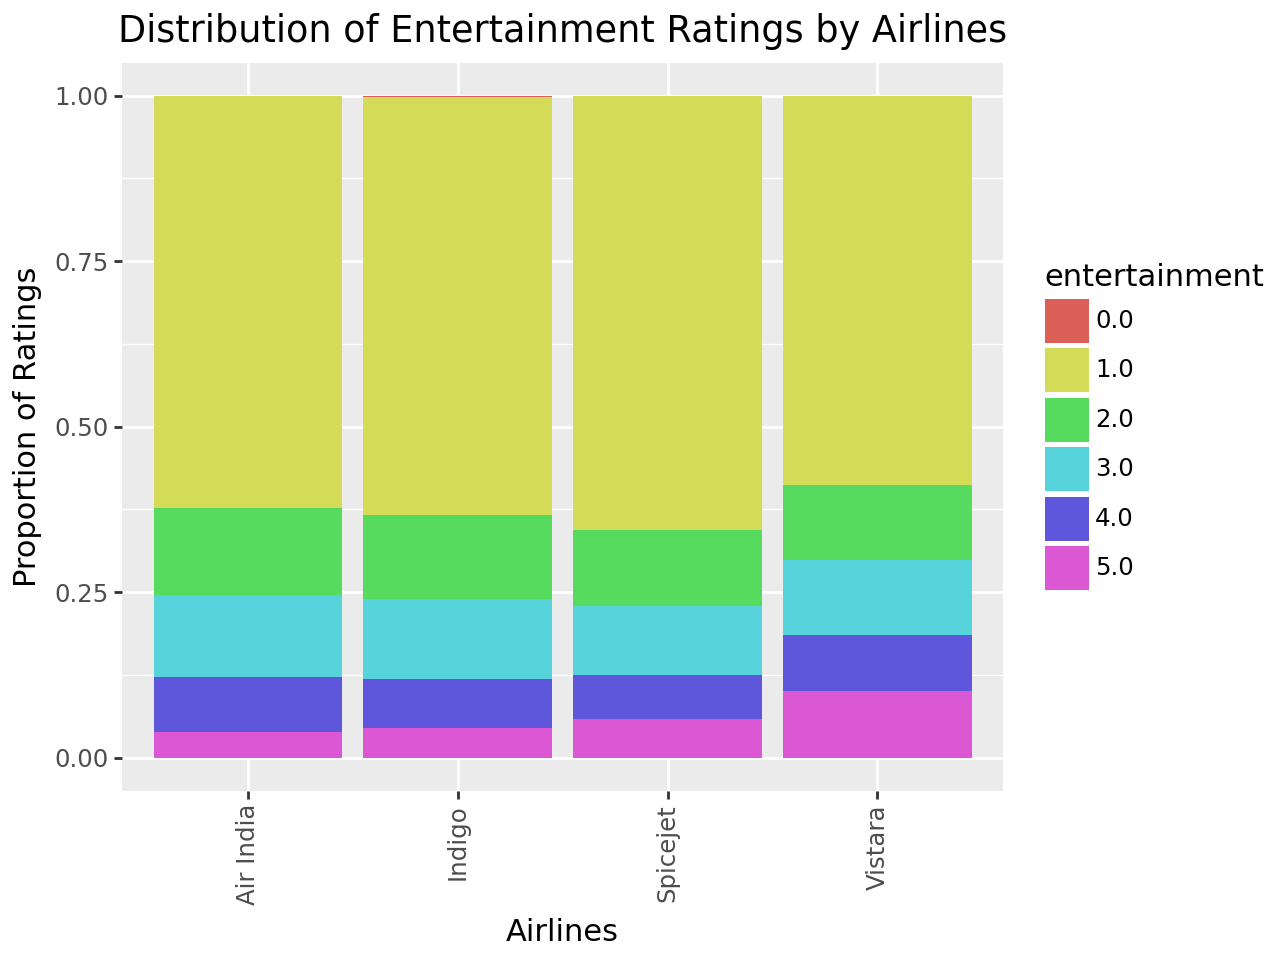

In [ ]:
reviews['entertainment'] = reviews['entertainment'].astype(str)
(ggplot(reviews[reviews.entertainment != "0"], aes(x="Airlines", fill="entertainment"))
    + geom_bar(position="fill")
    + scale_fill_discrete(name="")
    + theme(axis_text_x=element_text(rotation=90, hjust=2))
)+ labs(title="Distribution of Entertainment Ratings by Airlines",
           x="Airlines",
           y="Proportion of Ratings")

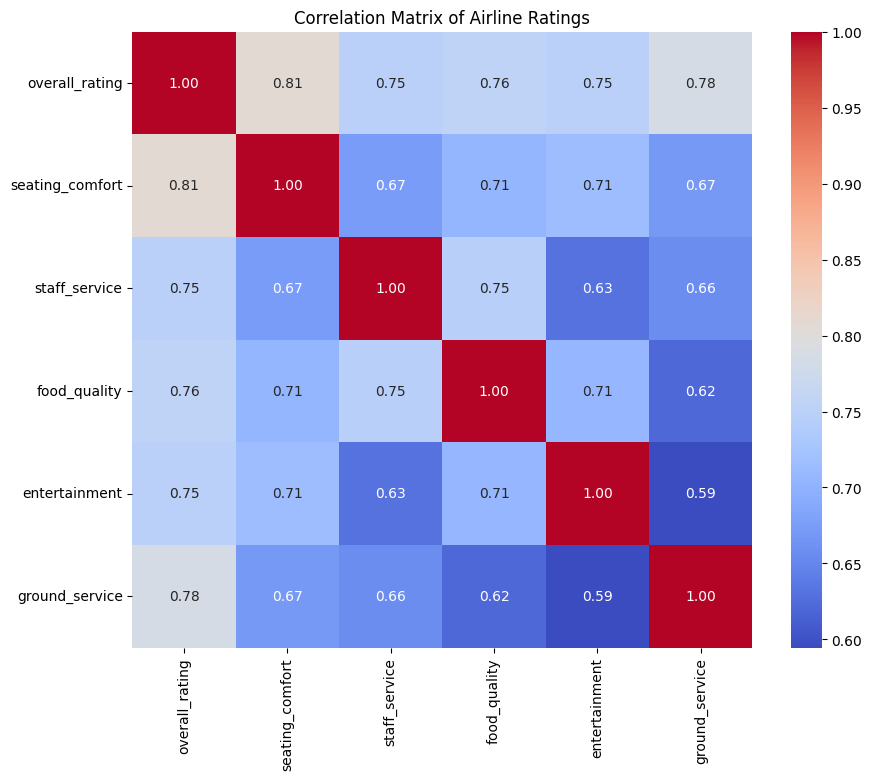

In [ ]:
import matplotlib.pyplot as plt
# Correlation Matrix Heatmap
correlation_matrix = reviews[['overall_rating', 'seating_comfort', 'staff_service', 'food_quality', 'entertainment', 'ground_service']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Airline Ratings')
plt.show()


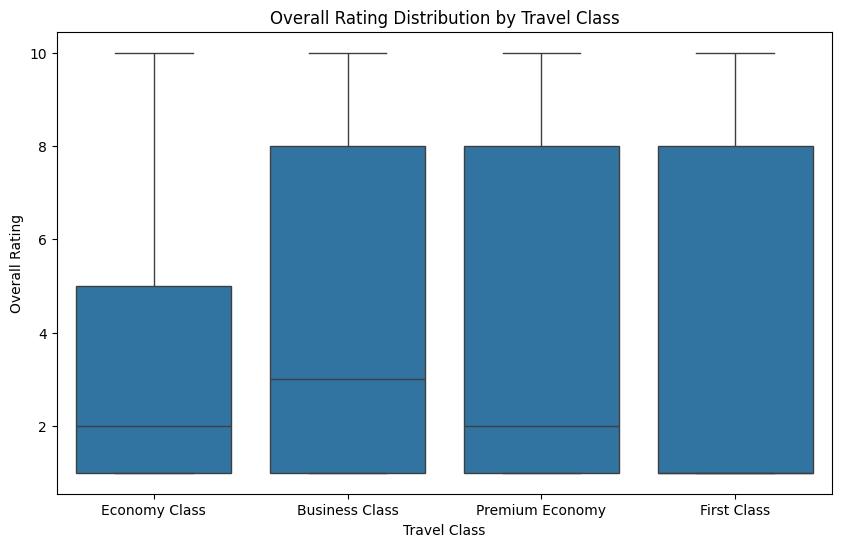

In [ ]:
# Box Plot - Overall Rating Distribution by Travel Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='travel_class', y='overall_rating', data=reviews)
plt.title('Overall Rating Distribution by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Overall Rating')
plt.show()

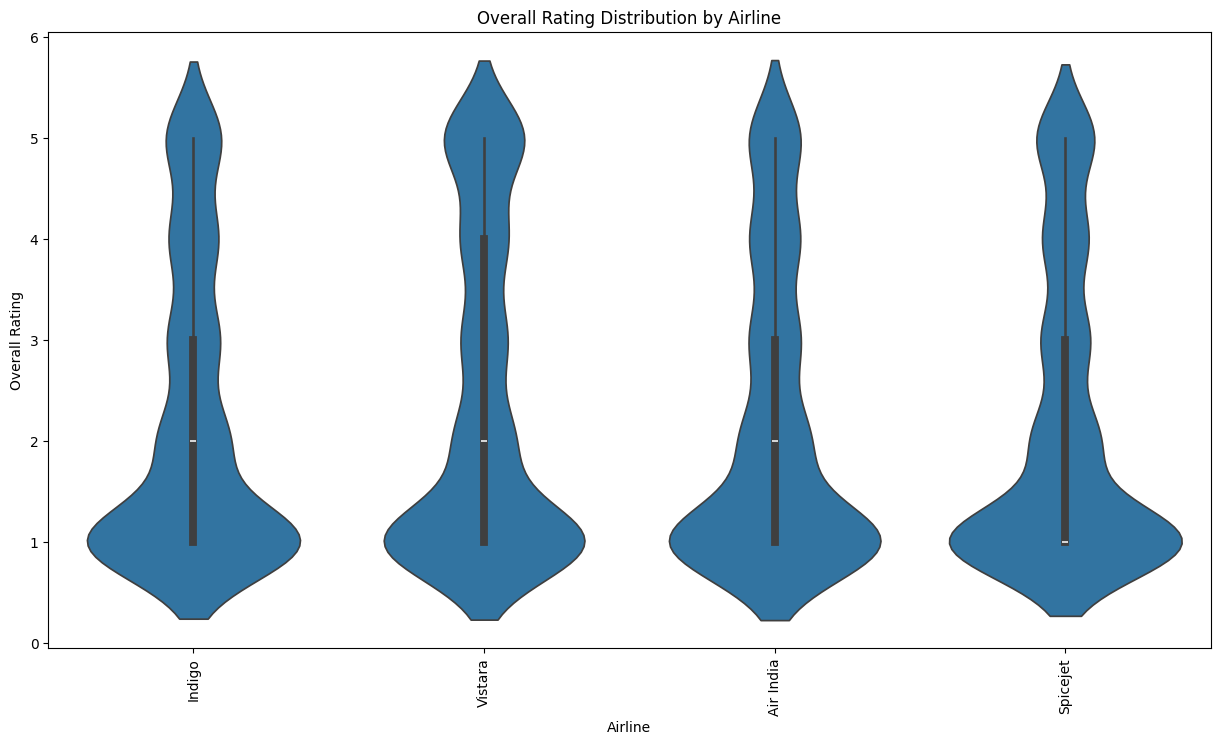

In [ ]:
# Violin Plot - Overall Rating Distribution by Airline
plt.figure(figsize=(15, 8))
sns.violinplot(x='Airlines', y='value_for_money', data=reviews)
plt.title('Overall Rating Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Group the data by date and calculate the mean sentiment score for each date
df_date = text.groupby('date')['Compound Score'].mean().reset_index()

# Set the date column as the index
df_date.set_index('date', inplace=True)

# Resample the data by month and calculate the mean sentiment score for each month
df_month = df_date.resample('M').mean()

# Create a line plot of sentiment scores over time
plt.figure(figsize=(12,6))
plt.plot(df_month.index, df_month['Compound Score'], marker='o')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score over Time')
plt.show()